In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("recipes-with-nutrition.csv")
df.head()


,recipe_name,source,url,servings,calories,total_weight_g,image_url,diet_labels,health_labels,cautions,cuisine_type,meal_type,dish_type,ingredient_lines,ingredients,total_nutrients,daily_values,digest
0,Classic Cabbage Slaw with Grandmother Shinn's ...,Food Network,https://www.foodnetwork.com/recipes/classic-ca...,6.0,511.283250,1239.311259,https://datahive-prod-dataset-products.s3.eu-c...,"[""Balanced""]","[""Vegetarian"",""Gluten-Free"",""Peanut-Free"",""Tre...",[],"[""american""]","[""lunch/dinner""]","[""salad""]","[""1 tablespoon kosher salt"",""2 cups water"",""4 ...","[{""food"":""kosher salt"",""text"":""1 tablespoon ko...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":28...."
1,Black Bean Soup,Cookstr,http://www.cookstr.com/recipes/black-bean-soup...,8.0,1850.998990,3339.583230,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Dairy-Free"",""Gluten-Free"",""Egg-Free"",""Peanut...","[""Sulfites""]","[""american""]","[""lunch/dinner""]","[""soup""]","[""1 pound fully cooked bone-in ham steak"",""1 t...","[{""food"":""ham steak"",""text"":""1 pound fully coo...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":77...."
2,Eat for Eight Bucks: Tofu with Tomatoes and Ci...,Serious Eats,http://www.seriouseats.com/recipes/2010/06/eat...,4.0,1643.758565,1453.960928,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber"",""Low-Carb""]","[""Vegan"",""Vegetarian"",""Dairy-Free"",""Egg-Free"",...","[""Gluten"",""Wheat"",""Sulfites""]","[""asian""]","[""lunch/dinner""]","[""main course""]","[""1 pound medium to firm tofu, cut into 1-inch...","[{""food"":""firm tofu"",""text"":""1 pound medium to...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":54...."
3,Fried Chicken Banh Mi,Food Network,https://www.foodnetwork.com/recipes/fried-chic...,4.0,8471.182075,2547.239375,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Peanut-Free"",""Tree-Nut-Free"",""Fish-Free"",""Sh...","[""Gluten"",""Wheat"",""Sulfites""]","[""south east asian""]","[""lunch/dinner""]","[""sandwiches""]","[""Neutral oil, for frying"",""1/2 cup unseasoned...","[{""food"":""oil"",""text"":""Neutral oil, for frying...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":0,""..."
4,The Macaron Frappé,French Revolution Food,http://www.frenchrevolutionfood.com/2013/07/le...,1.0,276.243903,438.762998,https://datahive-prod-dataset-products.s3.eu-c...,[],"[""Vegetarian"",""Peanut-Free"",""Tree-Nut-Free"",""S...","[""Sulfites""]","[""french""]","[""snack""]","[""desserts""]","[""1 macaron (about ½ ounce), in any flavor you...","[{""food"":""macaron"",""text"":""1 macaron (about ½ ...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit...","{""K"":{""unit"":""%"",""label"":""Potassium"",""quantity...","[{""sub"":[{""tag"":""FASAT"",""unit"":""g"",""daily"":47...."


In [3]:
df.dtypes

recipe_name          object
source               object
url                  object
servings            float64
calories            float64
total_weight_g      float64
image_url            object
diet_labels          object
health_labels        object
cautions             object
cuisine_type         object
meal_type            object
dish_type            object
ingredient_lines     object
ingredients          object
total_nutrients      object
daily_values         object
digest               object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39447 entries, 0 to 39446
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recipe_name       39447 non-null  object 
 1   source            39447 non-null  object 
 2   url               39447 non-null  object 
 3   servings          39447 non-null  float64
 4   calories          39447 non-null  float64
 5   total_weight_g    39447 non-null  float64
 6   image_url         39170 non-null  object 
 7   diet_labels       39447 non-null  object 
 8   health_labels     39447 non-null  object 
 9   cautions          39447 non-null  object 
 10  cuisine_type      39447 non-null  object 
 11  meal_type         39447 non-null  object 
 12  dish_type         39447 non-null  object 
 13  ingredient_lines  39447 non-null  object 
 14  ingredients       39447 non-null  object 
 15  total_nutrients   39447 non-null  object 
 16  daily_values      39447 non-null  object

In [5]:
df.columns

Index(['recipe_name', 'source', 'url', 'servings', 'calories',
       'total_weight_g', 'image_url', 'diet_labels', 'health_labels',
       'cautions', 'cuisine_type', 'meal_type', 'dish_type',
       'ingredient_lines', 'ingredients', 'total_nutrients', 'daily_values',
       'digest'],
      dtype='object')

Missing values per column:
 recipe_name           0
source                0
url                   0
servings              0
calories              0
total_weight_g        0
image_url           277
diet_labels           0
health_labels         0
cautions              0
cuisine_type          0
meal_type             0
dish_type             0
ingredient_lines      0
ingredients           0
total_nutrients       0
daily_values          0
digest                0
dtype: int64


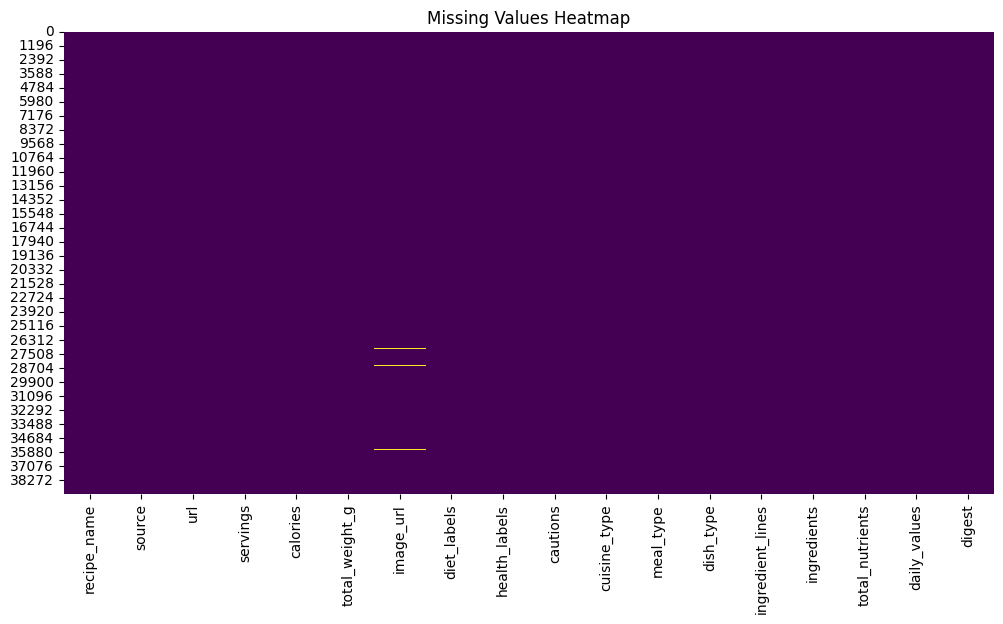

In [6]:
print("Missing values per column:\n", df.isnull().sum())

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
df["image_url"] = df["image_url"].fillna("https://via.placeholder.com/300?text=No+Image")
print("Missing values per column:\n", df.isnull().sum())
print("Remaining rows:", len(df))

Missing values per column:
 recipe_name         0
source              0
url                 0
servings            0
calories            0
total_weight_g      0
image_url           0
diet_labels         0
health_labels       0
cautions            0
cuisine_type        0
meal_type           0
dish_type           0
ingredient_lines    0
ingredients         0
total_nutrients     0
daily_values        0
digest              0
dtype: int64
Remaining rows: 39447


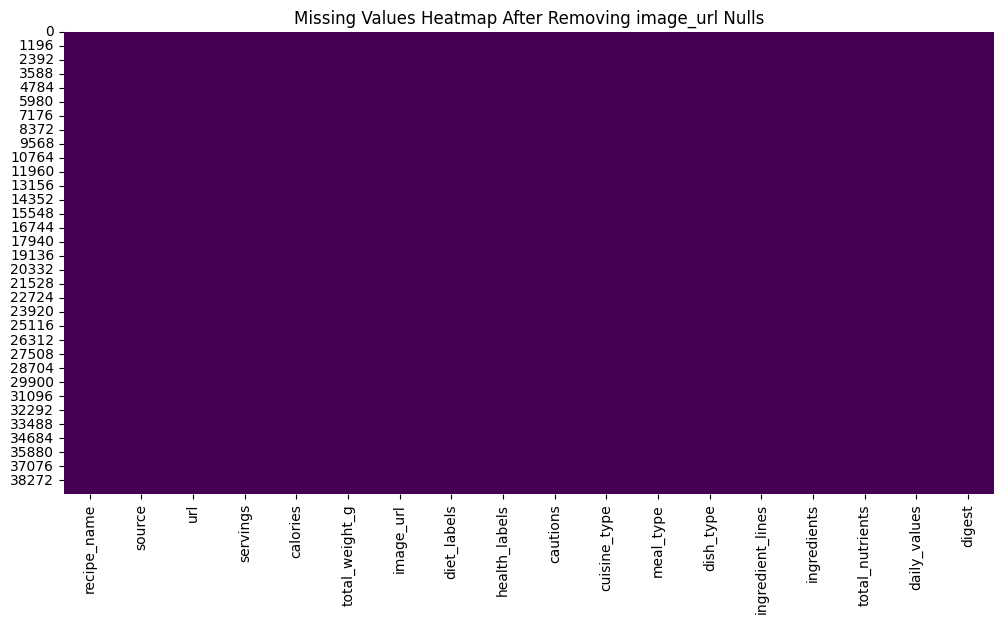

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap After Removing image_url Nulls")
plt.show()

In [9]:
print(df.dtypes)

for col in ['diet_labels', 'health_labels', 'cautions', 'cuisine_type', 'meal_type', 'dish_type']:
    print(f"\n{col} unique values:")
    print(df[col].unique()[:10])


recipe_name          object
source               object
url                  object
servings            float64
calories            float64
total_weight_g      float64
image_url            object
diet_labels          object
health_labels        object
cautions             object
cuisine_type         object
meal_type            object
dish_type            object
ingredient_lines     object
ingredients          object
total_nutrients      object
daily_values         object
digest               object
dtype: object

diet_labels unique values:
['["Balanced"]' '["High-Fiber"]' '["High-Fiber","Low-Carb"]' '[]'
 '["Low-Carb"]' '["Low-Sodium"]' '["Low-Fat","Low-Sodium"]'
 '["High-Fiber","Low-Sodium"]' '["High-Fiber","Low-Fat"]'
 '["Low-Carb","Low-Sodium"]']

health_labels unique values:
['["Vegetarian","Gluten-Free","Peanut-Free","Tree-Nut-Free","Soy-Free","Fish-Free","Shellfish-Free"]'
 '["Dairy-Free","Gluten-Free","Egg-Free","Peanut-Free","Tree-Nut-Free","Soy-Free","Fish-Free","Shellfish-Fre

In [10]:
columns_to_drop = ['source', 'url', 'ingredients', 'daily_values', 'digest']
df_clean = df.drop(columns=columns_to_drop)
df_clean.head()

,recipe_name,servings,calories,total_weight_g,image_url,diet_labels,health_labels,cautions,cuisine_type,meal_type,dish_type,ingredient_lines,total_nutrients
0,Classic Cabbage Slaw with Grandmother Shinn's ...,6.0,511.283250,1239.311259,https://datahive-prod-dataset-products.s3.eu-c...,"[""Balanced""]","[""Vegetarian"",""Gluten-Free"",""Peanut-Free"",""Tre...",[],"[""american""]","[""lunch/dinner""]","[""salad""]","[""1 tablespoon kosher salt"",""2 cups water"",""4 ...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
1,Black Bean Soup,8.0,1850.998990,3339.583230,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Dairy-Free"",""Gluten-Free"",""Egg-Free"",""Peanut...","[""Sulfites""]","[""american""]","[""lunch/dinner""]","[""soup""]","[""1 pound fully cooked bone-in ham steak"",""1 t...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
2,Eat for Eight Bucks: Tofu with Tomatoes and Ci...,4.0,1643.758565,1453.960928,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber"",""Low-Carb""]","[""Vegan"",""Vegetarian"",""Dairy-Free"",""Egg-Free"",...","[""Gluten"",""Wheat"",""Sulfites""]","[""asian""]","[""lunch/dinner""]","[""main course""]","[""1 pound medium to firm tofu, cut into 1-inch...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
3,Fried Chicken Banh Mi,4.0,8471.182075,2547.239375,https://datahive-prod-dataset-products.s3.eu-c...,"[""High-Fiber""]","[""Peanut-Free"",""Tree-Nut-Free"",""Fish-Free"",""Sh...","[""Gluten"",""Wheat"",""Sulfites""]","[""south east asian""]","[""lunch/dinner""]","[""sandwiches""]","[""Neutral oil, for frying"",""1/2 cup unseasoned...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."
4,The Macaron Frappé,1.0,276.243903,438.762998,https://datahive-prod-dataset-products.s3.eu-c...,[],"[""Vegetarian"",""Peanut-Free"",""Tree-Nut-Free"",""S...","[""Sulfites""]","[""french""]","[""snack""]","[""desserts""]","[""1 macaron (about ½ ounce), in any flavor you...","{""K"":{""unit"":""mg"",""label"":""Potassium"",""quantit..."


In [11]:
numeric_cols = ['servings', 'calories', 'total_weight_g']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())


In [12]:
def parse_list(x):
    if isinstance(x, list):
        return x
    try:
        return ast.literal_eval(x)
    except:
        return []

list_cols = ['diet_labels', 'health_labels', 'cautions', 'cuisine_type', 'meal_type', 'dish_type', 'ingredient_lines']
for col in list_cols:
    df_clean[col] = df_clean[col].apply(parse_list)

In [13]:
def extract_nutrients(x):
    protein = fat = carbs = 0.0
    try:
        nutrients = ast.literal_eval(x)
        protein = round(nutrients.get("PROCNT", {}).get("quantity", 0), 2)
        fat     = round(nutrients.get("FAT", {}).get("quantity", 0), 2)
        carbs   = round(nutrients.get("CHOCDF", {}).get("quantity", 0), 2)
    except:
        pass
    return pd.Series([protein, fat, carbs])

df_clean[["protein", "fat", "carbs"]] = df_clean["total_nutrients"].apply(extract_nutrients)


In [14]:
NON_VEG = ["chicken","beef","pork","fish","egg","mutton","shrimp","meat","lamb"]

def detect_food_type(ingredients):
    text = " ".join(ingredients).lower()
    return "non-veg" if any(x in text for x in NON_VEG) else "veg"

df_clean["food_type"] = df_clean["ingredient_lines"].apply(detect_food_type)

In [ ]:

def is_healthy_by_labels(row):
    labels = row['diet_labels'] + row['health_labels']
    healthy_keywords = ['low-fat', 'low-carb', 'high-protein', 'balanced', 'low-sodium']
    unhealthy_keywords = ['high-fat']
    
    labels_lower = [l.lower() for l in labels]
    
    healthy_count = sum(1 for kw in healthy_keywords if any(kw in l for l in labels_lower))
    unhealthy_count = sum(1 for kw in unhealthy_keywords if any(kw in l for l in labels_lower))
    
    
    cal_score = 1 if row['calories'] <= 650 else 0
    protein_score = 1 if row['protein'] >= 8 else 0
    fat_score = 1 if row['fat'] <= 40 else 0
    
    total_score = healthy_count - unhealthy_count + cal_score + protein_score + fat_score
    
    return 1 if total_score >= 3 else 0

df_clean["healthy"] = df_clean.apply(is_healthy_by_labels, axis=1)

print(f"Healthy class distribution:\n{df_clean['healthy'].value_counts()}")
print(f"Healthy ratio: {df_clean['healthy'].mean():.2%}")

Healthy class distribution:
healthy
0    25472
1    13975
Name: count, dtype: int64
Healthy ratio: 35.43%


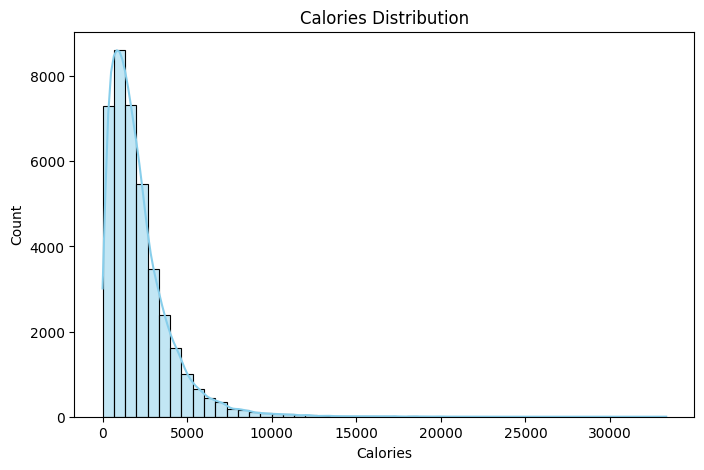

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['calories'], bins=50, kde=True, color='skyblue')
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.show()

In [17]:
df_clean['meal_type_str'] = df_clean['meal_type'].apply(lambda x: ", ".join(x))
top_meals = df_clean['meal_type_str'].value_counts().head(10)

C:\Users\ByeBye\AppData\Local\Temp\ipykernel_38596\4040892023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_meals.index, y=top_meals.values, palette="magma")


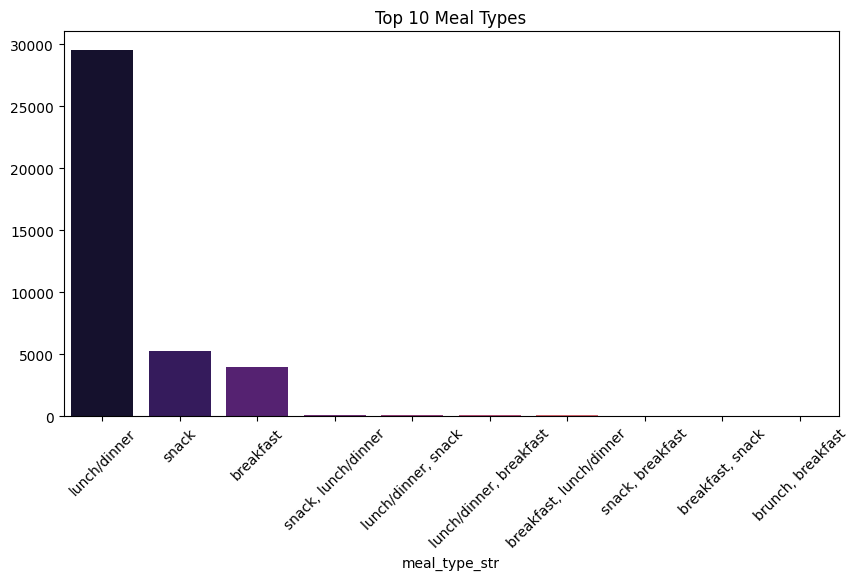

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_meals.index, y=top_meals.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Meal Types")
plt.show()

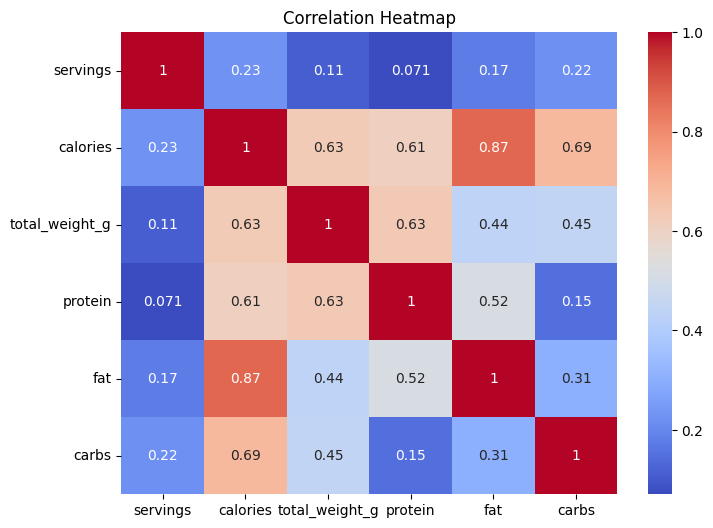

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['servings','calories','total_weight_g','protein','fat','carbs']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

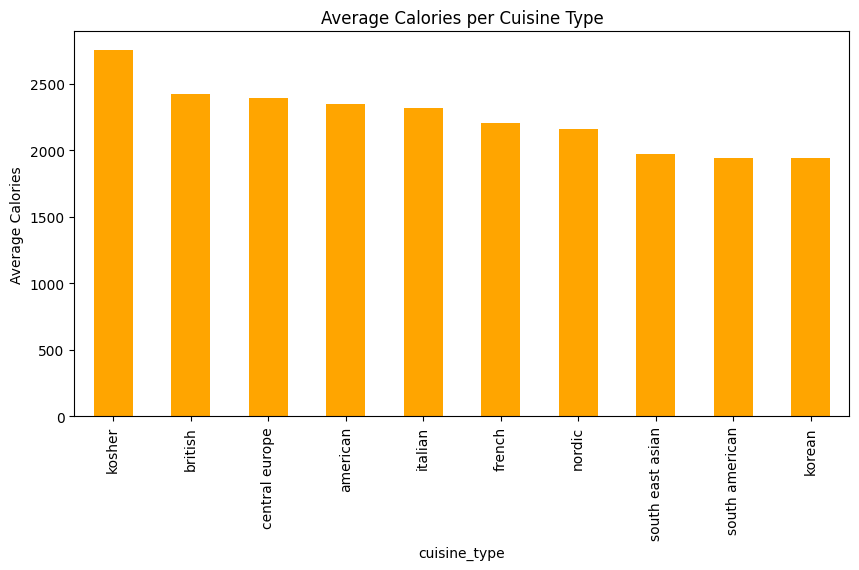

In [20]:
df_clean['cuisine_type_str'] = df_clean['cuisine_type'].apply(lambda x: ", ".join(x))
top_cuisines = df_clean.explode('cuisine_type').groupby('cuisine_type')['calories'].mean().sort_values(ascending=False).head(10)
top_cuisines.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average Calories per Cuisine Type")
plt.ylabel("Average Calories")
plt.show()

In [21]:
features = ["calories", "protein", "fat", "carbs"]
X = df_clean[features]
y = df_clean["healthy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score


dt_model = DecisionTreeClassifier(
    max_depth=5,           
    min_samples_split=20, 
    min_samples_leaf=10,   
    max_features='sqrt',  
    random_state=42
)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


dt_train_acc = dt_model.score(X_train, y_train)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)

print("Decision Tree (Regularized):")
print(f"  Training Accuracy: {dt_train_acc:.4f}")
print(f"  Test Accuracy:     {dt_accuracy:.4f}")
print(f"  Overfit Gap:       {dt_train_acc - dt_accuracy:.4f}")
print(f"  Cross-Val Mean:    {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std()*2:.4f})")

Decision Tree (Regularized):
  Training Accuracy: 0.9043
  Test Accuracy:     0.9037
  Overfit Gap:       0.0006
  Cross-Val Mean:    0.9027 (+/- 0.0050)


In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


param_grid = {'n_neighbors': range(3, 21), 'weights': ['uniform', 'distance']}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_cv.fit(X_scaled, y)


knn_model = knn_cv.best_estimator_
knn_model.fit(X_train_knn, y_train_knn)

knn_pred = knn_model.predict(X_test_knn)
knn_accuracy = accuracy_score(y_test_knn, knn_pred)


knn_train_acc = knn_model.score(X_train_knn, y_train_knn)

print("KNN (Tuned with Cross-Validation):")
print(f"  Best K:            {knn_cv.best_params_['n_neighbors']}")
print(f"  Best Weights:      {knn_cv.best_params_['weights']}")
print(f"  Best CV Score:     {knn_cv.best_score_:.4f}")
print(f"  Training Accuracy: {knn_train_acc:.4f}")
print(f"  Test Accuracy:     {knn_accuracy:.4f}")
print(f"  Overfit Gap:       {knn_train_acc - knn_accuracy:.4f}")

KNN (Tuned with Cross-Validation):
  Best K:            16
  Best Weights:      distance
  Best CV Score:     0.9149
  Training Accuracy: 0.9999
  Test Accuracy:     0.9163
  Overfit Gap:       0.0836


In [24]:
from collections import Counter

def ingredient_similarity(ing_list, all_recipes_ings):
    if not ing_list:
        return [0.0] * len(all_recipes_ings)
    ing_set = set(ing_list)
    similarities = []
    for other_ings in all_recipes_ings:
        other_set = set(other_ings)
        if len(ing_set | other_set) == 0:
            sim = 0
        else:
            sim = len(ing_set & other_set) / len(ing_set | other_set)
        similarities.append(sim)
    return similarities

df_clean['ingredients_text'] = df_clean['ingredient_lines'].apply(lambda x: " ".join(x) if x else "unknown")

try:
    tfidf = TfidfVectorizer(stop_words='english', max_features=500, min_df=1, analyzer='char', ngram_range=(2, 3))
    tfidf_matrix = tfidf.fit_transform(df_clean['ingredients_text'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
except:
    all_ings = df_clean['ingredient_lines'].tolist()
    cosine_sim = np.zeros((len(df_clean), len(df_clean)))
    for i in range(len(df_clean)):
        cosine_sim[i] = ingredient_similarity(all_ings[i], all_ings)

d:\colz\AI\FoodRecommend\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:548: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


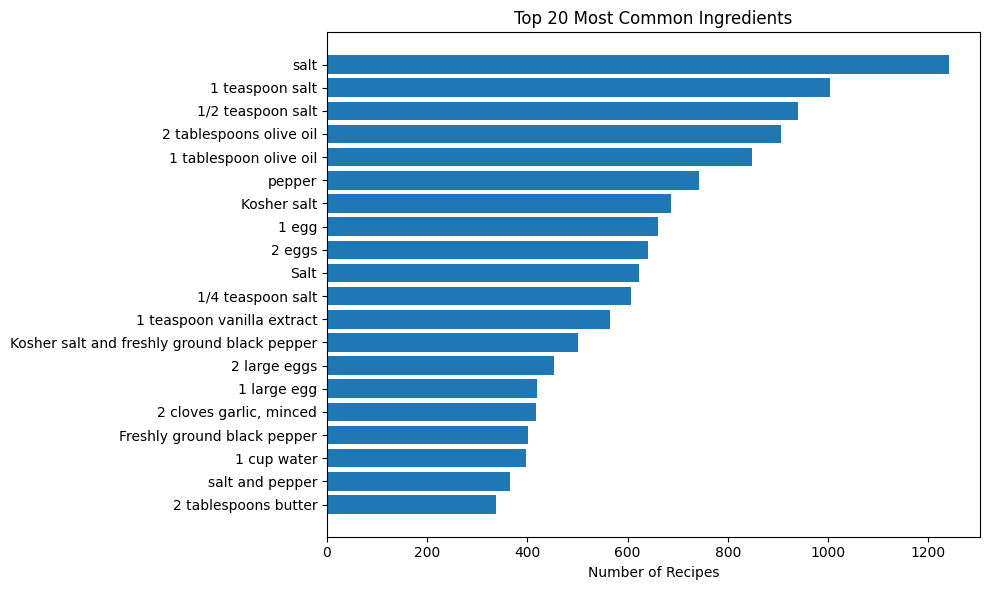

In [25]:
all_ingredients = []
for ing_list in df_clean['ingredient_lines']:
    all_ingredients.extend(ing_list)


ingredient_counts = Counter(all_ingredients)

top_ingredients = ingredient_counts.most_common(20)

labels = [item[0] for item in top_ingredients]
values = [item[1] for item in top_ingredients]

plt.figure(figsize=(10, 6))
plt.barh(labels, values)
plt.xlabel("Number of Recipes")
plt.title("Top 20 Most Common Ingredients")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

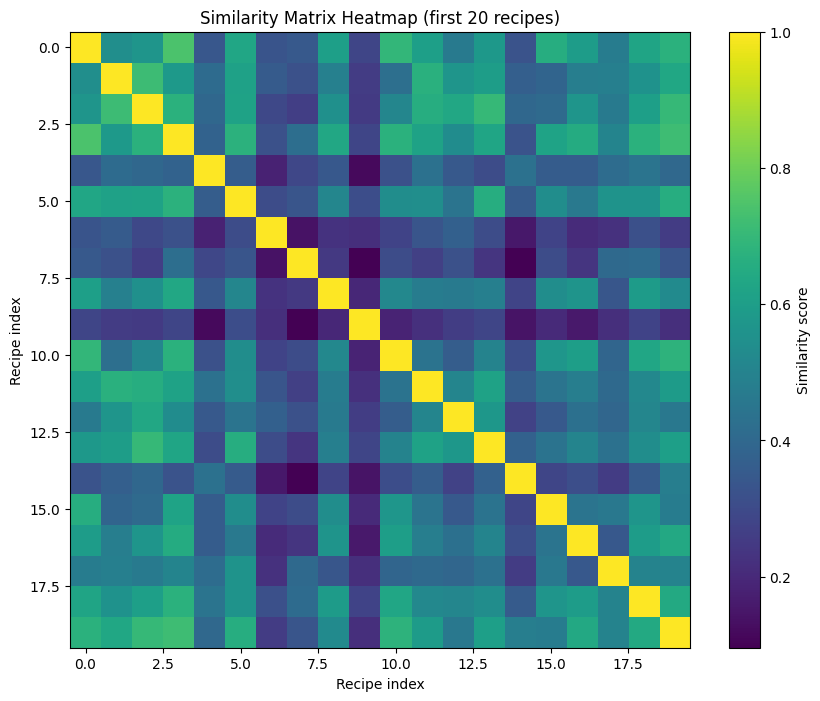

In [26]:
#Heatmap (subset)
def show_heatmap(cosine_sim, n=20):
    n = min(n, cosine_sim.shape[0])
    sim_n = cosine_sim[:n, :n]
    plt.figure(figsize=(10, 8))
    plt.imshow(sim_n, aspect="auto")
    plt.colorbar(label="Similarity score")
    plt.title(f"Similarity Matrix Heatmap (first {n} recipes)")
    plt.xlabel("Recipe index")
    plt.ylabel("Recipe index")
    plt.show()
show_heatmap(cosine_sim, n=20)

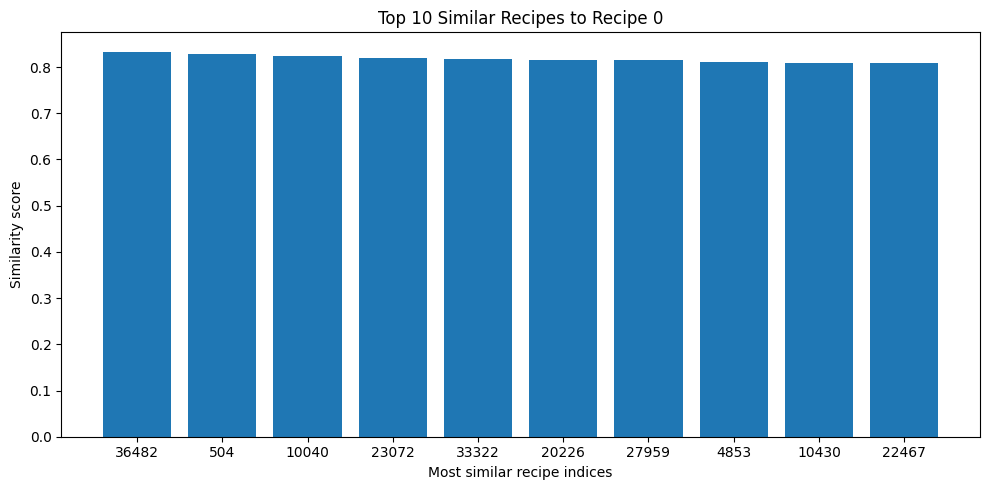

In [ ]:


def show_topk_bar(cosine_sim, recipe_idx=0, top_k=10):
    scores = cosine_sim[recipe_idx].copy()
    scores[recipe_idx] = -1  

    top_idx = np.argsort(scores)[::-1][:top_k]
    top_scores = scores[top_idx]

    plt.figure(figsize=(10, 5))
    plt.bar(range(top_k), top_scores)
    plt.xticks(range(top_k), [str(i) for i in top_idx], rotation=0)
    plt.ylabel("Similarity score")
    plt.xlabel("Most similar recipe indices")
    plt.title(f"Top {top_k} Similar Recipes to Recipe {recipe_idx}")
    plt.tight_layout()
    plt.show()

show_topk_bar(cosine_sim, recipe_idx=0, top_k=10)


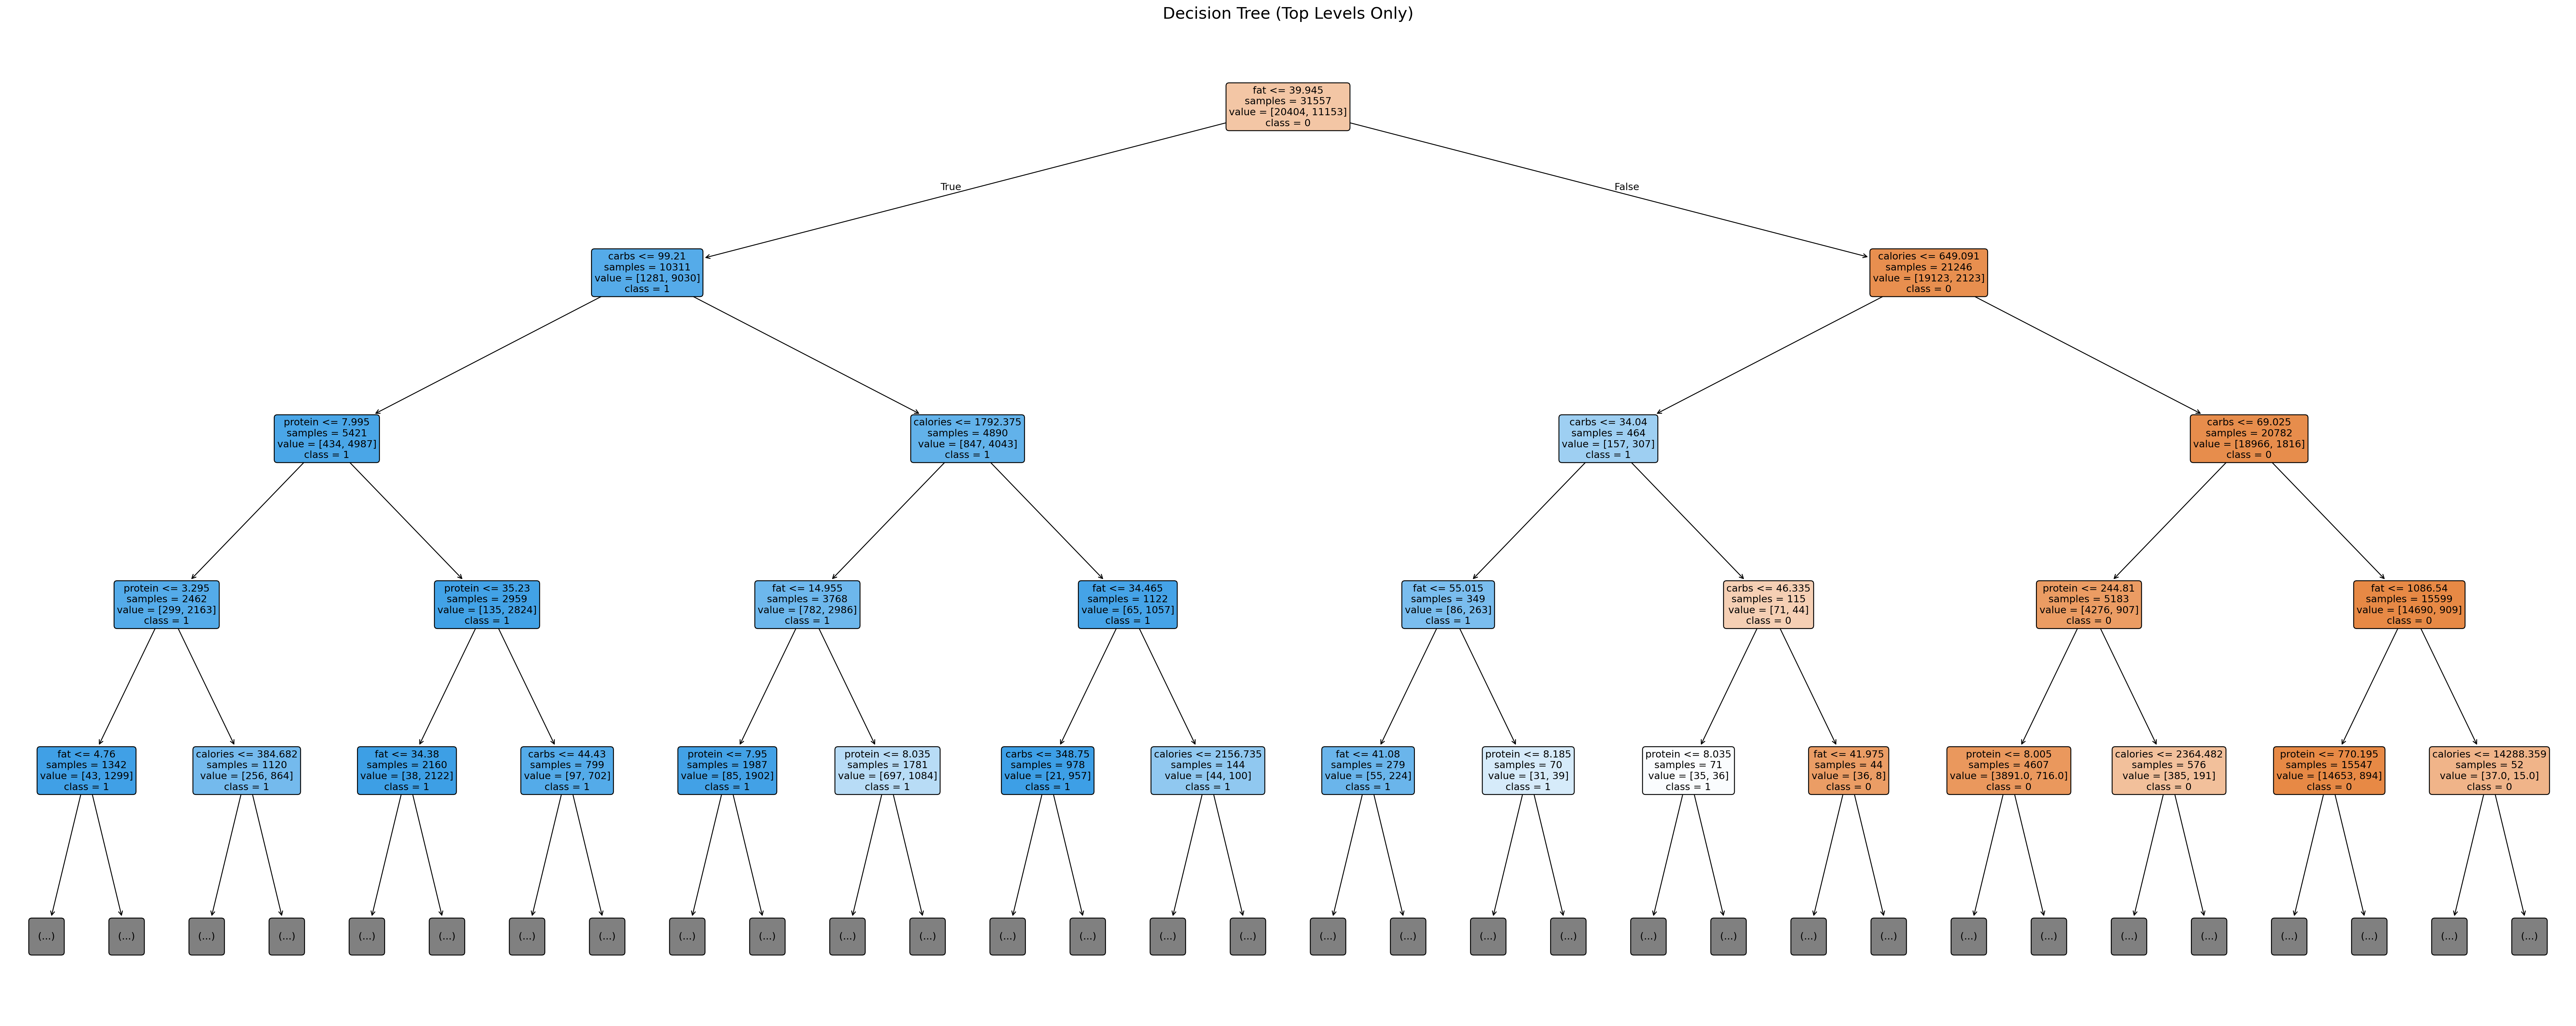

In [39]:
plt.figure(figsize=(40, 16), dpi=200)
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,
    rounded=True,
    fontsize=11,
    max_depth=4,      
    impurity=False
)
plt.title("Decision Tree (Top Levels Only)", fontsize=18)
plt.tight_layout()
plt.show()


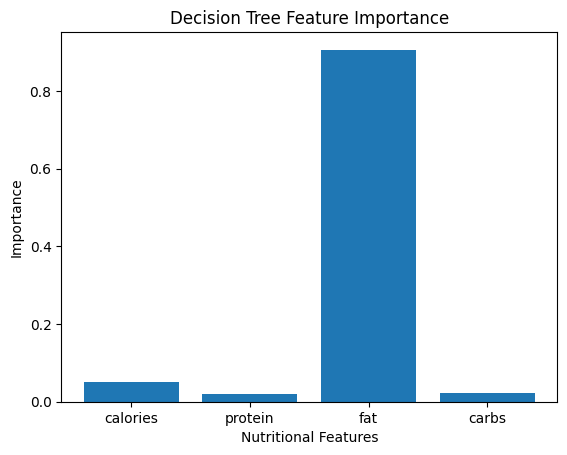

In [29]:
importance = dt_model.feature_importances_
plt.figure()
plt.bar(features, importance)
plt.xlabel("Nutritional Features")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

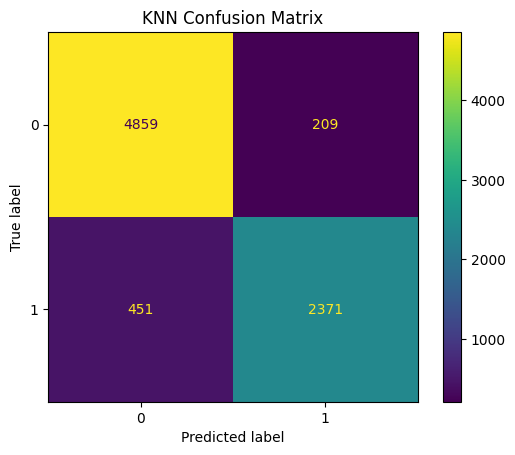

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test_knn, knn_pred)
plt.title("KNN Confusion Matrix")
plt.show()

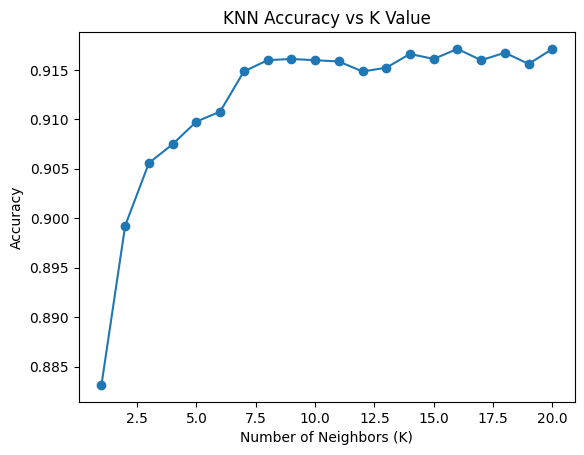

In [31]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    pred = knn.predict(X_test_knn)
    accuracies.append(accuracy_score(y_test_knn, pred))

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.show()


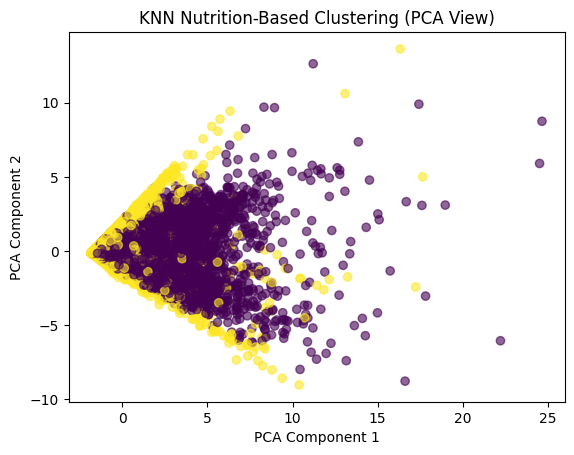

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Nutrition-Based Clustering (PCA View)")
plt.show()


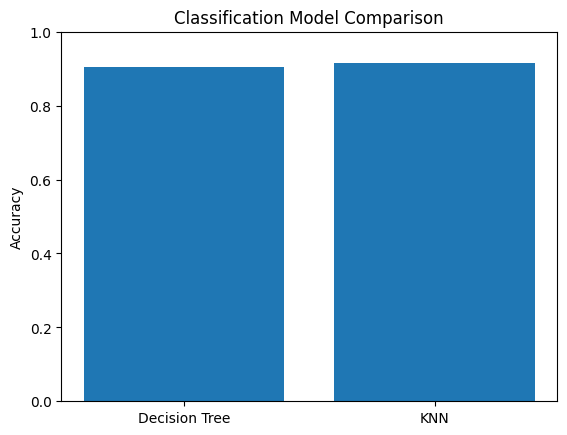

In [33]:
plt.figure()
plt.bar(["Decision Tree", "KNN"], [dt_accuracy, knn_accuracy])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Classification Model Comparison")
plt.show()


In [34]:
def recommend_food(
    age, height, current_weight, target_weight, food_pref="both", cuisine="all", gender="M", 
    activity_level="moderate", kcal_per_kg=110.0, min_daily_cal=1200.0, 
    max_delta_kcal=900.0, cap_factor=1.5, w_health=0.45, w_macro=0.35, w_ingred=0.20
):
    
    def bmi_info(w_kg, h_cm):
        bmi_val = w_kg / ((h_cm / 100) ** 2)
        if bmi_val < 18.5:
            cat = "underweight"
        elif bmi_val < 25:
            cat = "normal"
        elif bmi_val < 30:
            cat = "overweight"
        else:
            cat = "obese"
        return bmi_val, cat
    
    bmi_val, bmi_cat = bmi_info(current_weight, height)
    
    if gender.upper() == "M":
        bmr = 10 * current_weight + 6.25 * height - 5 * age + 5
    else:
        bmr = 10 * current_weight + 6.25 * height - 5 * age - 161
    
    activity_map = {
        "sedentary": 1.2,
        "light": 1.375,
        "moderate": 1.55,
        "active": 1.725,
        "very_active": 1.9
    }
    activity_mult = activity_map.get(activity_level.lower(), 1.55)
    tdee = bmr * activity_mult
    
    diff = target_weight - current_weight
    direction = "loss" if diff < 0 else "gain"
    
    delta_kcal = np.clip(abs(diff) * kcal_per_kg, 250.0, max_delta_kcal)
    
    if direction == "loss":
        target_cal = max(min_daily_cal, tdee - delta_kcal)
    else:
        target_cal = tdee + delta_kcal
    
    per_meal_target = target_cal / 3.0
    calorie_cap = per_meal_target * cap_factor
    calorie_range = (max(180.0, per_meal_target * 0.65), min(calorie_cap, per_meal_target + 350.0))
    
    if direction == "loss":
        macro_split = {"protein": 0.37, "fat": 0.25, "carbs": 0.38}
    elif direction == "gain":
        macro_split = {"protein": 0.28, "fat": 0.30, "carbs": 0.42}
    else:
        macro_split = {"protein": 0.30, "fat": 0.30, "carbs": 0.40}
    
    filtered_df = df_clean.copy()
    
    if food_pref.lower() in ["veg", "non-veg"]:
        filtered_df = filtered_df[filtered_df["food_type"] == food_pref.lower()]
    
    filtered_df = filtered_df[
        (filtered_df["calories"] >= calorie_range[0]) &
        (filtered_df["calories"] <= calorie_range[1])
    ]
    
    if cuisine.lower() != "all":
        filtered_df = filtered_df[filtered_df["cuisine_type"].apply(lambda x: cuisine.lower() in [c.lower() for c in x])]
    
    if len(filtered_df) == 0:
        return {
            "meta": {
                "bmi": round(bmi_val, 2),
                "bmi_category": bmi_cat,
                "target_calories": round(target_cal, 0),
                "calorie_range": (round(calorie_range[0], 0), round(calorie_range[1], 0))
            },
            "error": "No recipes match your criteria. Try adjusting preferences."
        }
    
    X_dt = filtered_df[features].values
    try:
        if hasattr(dt_model, "predict_proba"):
            dt_proba = dt_model.predict_proba(X_dt)[:, 1]
        else:
            dt_proba = dt_model.predict(X_dt).astype(float)
    except:
        dt_proba = np.ones(len(filtered_df))
    
    filtered_df["health_score"] = dt_proba
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(filtered_df[features])
    
    target_macros = np.array([
        filtered_df["calories"].mean(),
        filtered_df["calories"].mean() * macro_split["protein"],
        filtered_df["calories"].mean() * macro_split["fat"],
        filtered_df["calories"].mean() * macro_split["carbs"]
    ]).reshape(1, -1)
    target_macros_scaled = scaler.transform(target_macros)
    
    distances = np.linalg.norm(X_scaled - target_macros_scaled, axis=1)
    knn_scores = 1.0 / (1.0 + distances)
    
    filtered_df["knn_score"] = knn_scores
    
    filtered_indices = filtered_df.index.tolist()
    
    ingred_similarity = cosine_sim[filtered_indices][:, filtered_indices].mean(axis=1)
    
    filtered_df["ingred_score"] = ingred_similarity
    
    def normalize_signal(signal):
        min_val, max_val = signal.min(), signal.max()
        if max_val == min_val:
            return np.ones(len(signal))
        return (signal - min_val) / (max_val - min_val)
    
    health_norm = normalize_signal(filtered_df["health_score"].values)
    knn_norm = normalize_signal(filtered_df["knn_score"].values)
    ingred_norm = normalize_signal(filtered_df["ingred_score"].values)
    
    filtered_df["final_score"] = (
        w_health * health_norm + 
        w_macro * knn_norm + 
        w_ingred * ingred_norm
    )
    
    def get_meals(meal_type_filter, n_meals=3, excluded_indices=None):
        if excluded_indices is None:
            excluded_indices = set()
        
        # Filter by meal type
        meals_data = filtered_df[
            filtered_df["meal_type"].apply(lambda x: meal_type_filter.lower() in [m.lower() for m in x])
        ]
        
        # Exclude already recommended recipes
        meals_data = meals_data[~meals_data.index.isin(excluded_indices)]
        
        # Sort by final score and get top n
        meals_data = meals_data.sort_values("final_score", ascending=False).head(n_meals)
        
        # If not enough recipes found for this meal type, get from all remaining
        if len(meals_data) < n_meals:
            remaining = filtered_df[~filtered_df.index.isin(excluded_indices | set(meals_data.index))]
            remaining = remaining.sort_values("final_score", ascending=False).head(n_meals - len(meals_data))
            meals_data = pd.concat([meals_data, remaining])
        
        return [
            {
                "name": row["recipe_name"],
                "image_url": row["image_url"],
                "calories": round(row["calories"], 1),
                "protein_g": round(row["protein"], 1),
                "fat_g": round(row["fat"], 1),
                "carbs_g": round(row["carbs"], 1),
                "cuisine": ", ".join(row["cuisine_type"]) if row["cuisine_type"] else "Unknown",
                "health_score": round(row["health_score"], 3),
                "macro_score": round(row["knn_score"], 3),
                "ingredient_score": round(row["ingred_score"], 3),
                "final_score": round(row["final_score"], 3)
            }
            for _, row in meals_data.iterrows()
        ], set(meals_data.index)
    
    # Get meals while avoiding duplicates across breakfast, lunch, dinner
    breakfast_meals, breakfast_indices = get_meals("breakfast", 3, set())
    lunch_meals, lunch_indices = get_meals("lunch", 3, breakfast_indices)
    dinner_meals, dinner_indices = get_meals("dinner", 3, breakfast_indices | lunch_indices)
    
    return {
        "meta": {
            "bmi": round(bmi_val, 2),
            "bmi_category": bmi_cat,
            "current_weight": current_weight,
            "target_weight": target_weight,
            "weight_goal": direction.upper(),
            "target_calories": round(target_cal, 0),
            "calorie_range": (round(calorie_range[0], 0), round(calorie_range[1], 0)),
            "tdee": round(tdee, 0),
            "macro_split": macro_split
        },
        "breakfast": breakfast_meals,
        "lunch": lunch_meals,
        "dinner": dinner_meals
    }


In [35]:
def display_recommendations(result):
    if "error" in result:
        print(f"\nError: {result['error']}")
        return
    
    meta = result['meta']
    print("\n" + "=" * 70)
    print("PERSONALIZED FOOD RECOMMENDATION")
    print("=" * 70)
    
    print("\nYOUR PROFILE:")
    print(f"  Current Weight: {meta['current_weight']} kg")
    print(f"  Target Weight: {meta['target_weight']} kg")
    print(f"  Weight Goal: {meta['weight_goal']}")
    print(f"  BMI: {meta['bmi']} ({meta['bmi_category']})")
    print(f"  Daily Calorie Need (TDEE): {meta['tdee']} kcal")
    
    print("\nNUTRITION PLAN:")
    print(f"  Target Daily Calories: {meta['target_calories']} kcal")
    print(f"  Per-Meal Range: {meta['calorie_range'][0]:.0f} - {meta['calorie_range'][1]:.0f} kcal")
    macro = meta['macro_split']
    print(f"  Macro Split: Protein {macro['protein']*100:.0f}% | Fat {macro['fat']*100:.0f}% | Carbs {macro['carbs']*100:.0f}%")
    
    def display_meals(meal_name, meals):
        print(f"\n{meal_name.upper()} - Recommended Options:")
        for i, meal in enumerate(meals, 1):
            print(f"\n  Option {i}: {meal['name']}")
            print(f"    Image URL: {meal['image_url']}")
            print(f"    Calories: {meal['calories']} kcal")
            print(f"    Protein: {meal['protein_g']}g | Fat: {meal['fat_g']}g | Carbs: {meal['carbs_g']}g")
            print(f"    Cuisine: {meal['cuisine']}")
            print(f"    Score: {meal['final_score']:.3f}")
    
    display_meals("BREAKFAST", result['breakfast'])
    display_meals("LUNCH", result['lunch'])
    display_meals("DINNER", result['dinner'])
    
    print("\n" + "=" * 70)


print("\n" + "=" * 70)
print("FOOD RECOMMENDATION SYSTEM")
print("=" * 70)

print("\nEnter your details:\n")

while True:
    try:
        age = int(input("Age (years): "))
        if age < 1 or age > 120:
            print("Please enter age between 1 and 120")
            continue
        break
    except ValueError:
        print("Please enter a valid number")

while True:
    try:
        height = float(input("Height (cm): "))
        if height < 50 or height > 250:
            print("Please enter height between 50 and 250 cm")
            continue
        break
    except ValueError:
        print("Please enter a valid number")

while True:
    try:
        current_weight = float(input("Current Weight (kg): "))
        if current_weight < 20 or current_weight > 500:
            print("Please enter weight between 20 and 500 kg")
            continue
        break
    except ValueError:
        print("Please enter a valid number")

while True:
    try:
        target_weight = float(input("Target Weight (kg): "))
        if target_weight < 20 or target_weight > 500:
            print("Please enter weight between 20 and 500 kg")
            continue
        break
    except ValueError:
        print("Please enter a valid number")

gender = input("Gender (M/F) [default: M]: ").strip().upper() or "M"
if gender not in ["M", "F"]:
    gender = "M"

print("\nActivity Level:")
print("  1. Sedentary (little/no exercise)")
print("  2. Light (1-3 days/week)")
print("  3. Moderate (3-5 days/week)")
print("  4. Active (6-7 days/week)")
print("  5. Very Active (intense daily)")
activity_choice = input("Select (1-5) [default: 3]: ").strip() or "3"
activity_map_input = {
    "1": "sedentary", "2": "light", "3": "moderate", "4": "active", "5": "very_active"
}
activity_level = activity_map_input.get(activity_choice, "moderate")

print("\nFood Preference:")
print("  1. Vegetarian")
print("  2. Non-Vegetarian")
print("  3. Both")
food_choice = input("Select (1-3) [default: 3]: ").strip() or "3"
food_map_input = {"1": "veg", "2": "non-veg", "3": "both"}
food_pref = food_map_input.get(food_choice, "both")

print("\nCuisine Options: all, Italian, Asian, Mediterranean, Mexican, Indian, Chinese")
cuisine = input("Enter cuisine or 'all' [default: all]: ").strip().lower() or "all"

print("\nGenerating recommendations...")
recommendations = recommend_food(
    age=age,
    height=height,
    current_weight=current_weight,
    target_weight=target_weight,
    gender=gender,
    activity_level=activity_level,
    food_pref=food_pref,
    cuisine=cuisine
)

display_recommendations(recommendations)


FOOD RECOMMENDATION SYSTEM

Enter your details:


Activity Level:
  1. Sedentary (little/no exercise)
  2. Light (1-3 days/week)
  3. Moderate (3-5 days/week)
  4. Active (6-7 days/week)
  5. Very Active (intense daily)

Food Preference:
  1. Vegetarian
  2. Non-Vegetarian
  3. Both

Cuisine Options: all, Italian, Asian, Mediterranean, Mexican, Indian, Chinese

Generating recommendations...


d:\colz\AI\FoodRecommend\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\colz\AI\FoodRecommend\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



PERSONALIZED FOOD RECOMMENDATION

YOUR PROFILE:
  Current Weight: 85.0 kg
  Target Weight: 80.0 kg
  Weight Goal: LOSS
  BMI: 27.44 (overweight)
  Daily Calorie Need (TDEE): 2214.0 kcal

NUTRITION PLAN:
  Target Daily Calories: 1664.0 kcal
  Per-Meal Range: 361 - 832 kcal
  Macro Split: Protein 37% | Fat 25% | Carbs 38%

BREAKFAST - Recommended Options:

  Option 1: Sunny's Sweet and Spicy Breakfast Sausage
    Image URL: https://datahive-prod-dataset-products.s3.eu-central-1.amazonaws.com/dataset/346/df08e7d730a21b4806f15a01bea4374eb997b57e99a7f2404b9376208530e2b5/21096962.jpg
    Calories: 707.9 kcal
    Protein: 99.4g | Fat: 26.9g | Carbs: 19.2g
    Cuisine: american
    Score: 0.841

  Option 2: Vegan protein pancakes
    Image URL: https://datahive-prod-dataset-products.s3.eu-central-1.amazonaws.com/dataset/346/0653f91098ef1d5b4eb448f5a5506e65b048b1c90ebaa35252d4f63f216cead2/21116096.jpg
    Calories: 715.9 kcal
    Protein: 77.5g | Fat: 26.2g | Carbs: 44.3g
    Cuisine: american

In [36]:
import pickle
model_data = {
    'df_clean': df_clean,
    'dt_model': dt_model,
    'knn_model': knn_model,
    'scaler': scaler,
    'tfidf_matrix': tfidf_matrix if 'tfidf_matrix' in locals() else None,
    'cosine_sim': cosine_sim,
    'features': features,
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'X_train_knn': X_train_knn,
    'X_test_knn': X_test_knn,
    'y_train_knn': y_train_knn,
    'y_test_knn': y_test_knn
}

with open('food_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✓ Successfully saved all models and data to 'food_recommendation_model.pkl'")
print(f"File contains: {list(model_data.keys())}")

✓ Successfully saved all models and data to 'food_recommendation_model.pkl'
File contains: ['df_clean', 'dt_model', 'knn_model', 'scaler', 'tfidf_matrix', 'cosine_sim', 'features', 'X_train', 'X_test', 'y_train', 'y_test', 'X_train_knn', 'X_test_knn', 'y_train_knn', 'y_test_knn']
